### Global Solutions - Grupo HealthHear:
- Kaue Caponero Figueiredo - RM: 96466
- Gustavo Sorrilha Sanches - RM: 97068
- Natan Cruz - RM: 97324
- Vitor Rubim Passos - RM: 97092
- Mariana Santos Fernandes de Sousa - RM: 97503

# Questão 1 (25 pontos):
Realizar uma análise exploratória dos dados, identificando estatísticas descritivas, distribuições e tendências nos dados. Em seguida, aplique o algoritmo Principal Component Analysis (PCA) para reduzir a dimensionalidade dos dados e avaliar os componentes gerados, apresentando resultados baseados na variância dos dados. (OPCIONAL: utilize o algoritmo K-Means para agrupar os dados, se a tarefa for pertinente).

In [ ]:
# Importando as bibliotecas e pacotes necessários:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importar o arquivo 'maternal_health_risk.csv' nos ficheiros do Collab
data = files.upload()

Saving maternal_health_risk.csv to maternal_health_risk.csv


In [ ]:
# Convertendo CSV em Data Frame
data = pd.read_csv('maternal_health_risk.csv')
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
# Verificando tamanho
tamanho = data.shape
print("Tamanho do DataFrame:", tamanho)

Tamanho do DataFrame: (1014, 7)


In [ ]:
# Calculando dados faltantes
print("\nDados faltantes por coluna:")
print(data.isnull().sum())


Dados faltantes por coluna:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [ ]:
# Estatísticas Descritivas
print("Estatísticas Descritivas:")
print(data.describe())

Estatísticas Descritivas:
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


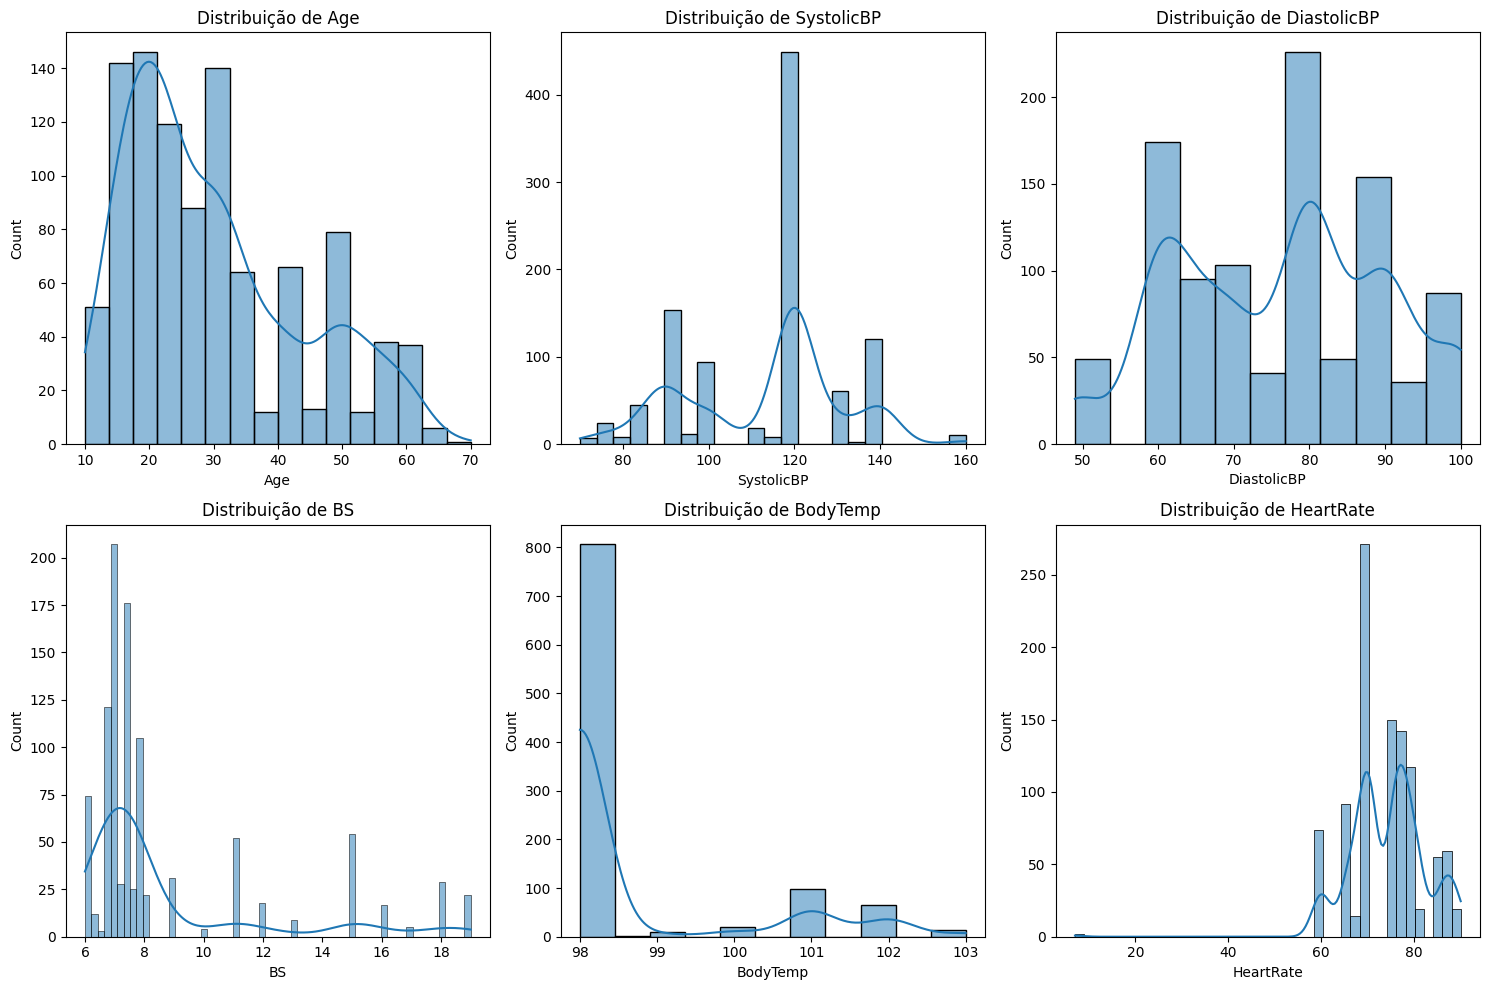

In [ ]:
# Histogramas para cada variável numérica
plt.figure(figsize=(15, 10))
colunas_numericas = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
for i, coluna in enumerate(colunas_numericas):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[coluna], kde=True)
    plt.title(f'Distribuição de {coluna}')
plt.tight_layout()
plt.show()

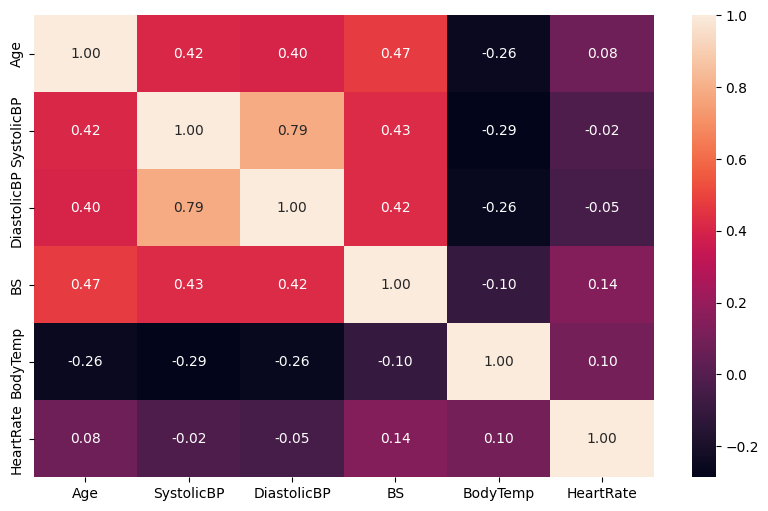

In [ ]:
# Análise de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(data[colunas_numericas].corr(), annot=True, fmt='.2f')
plt.show()

In [ ]:
# Aplicação do PCA
# Padronização dos dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[colunas_numericas])

In [ ]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

In [ ]:
# Explicando a variância
print("\nVariância explicada por cada componente:")
print(pca.explained_variance_ratio_)


Variância explicada por cada componente:
[0.4346489 0.1907302]


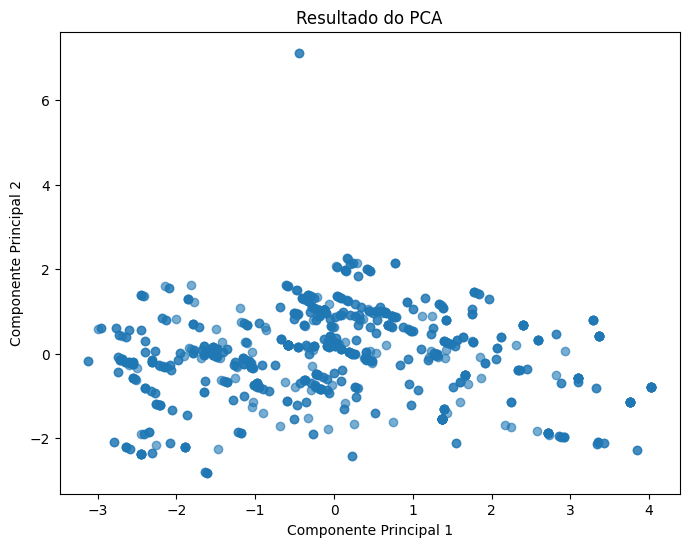

In [ ]:
# Visualização dos Componentes Principais
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Resultado do PCA')
plt.show()

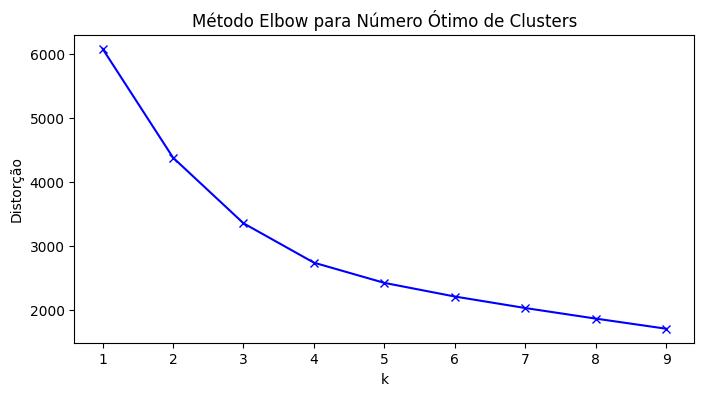

In [ ]:
# K-Means Clustering
# Determinação do número ótimo de clusters (método Elbow)
distorcoes = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_scaled)
    distorcoes.append(kmeanModel.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, distorcoes, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorção')
plt.title('Método Elbow para Número Ótimo de Clusters')
plt.show()

In [ ]:
# Encontrando o "cotovelo" no gráfico
cotovelo = None  # Variável para armazenar o ponto de cotovelo (número ideal de clusters)

# Loop para comparar as diferenças entre as distorções adjacentes
for i in range(1, len(distorcoes) - 1):
    diff1 = distorcoes[i - 1] - distorcoes[i]  # Diferença entre distorção anterior e atual
    diff2 = distorcoes[i] - distorcoes[i + 1]  # Diferença entre distorção atual e próxima
    if diff1 > diff2:
        cotovelo = i + 1  # Se a diferença anterior for maior que a próxima, encontramos o cotovelo
        break

# Imprimindo o número ideal de clusters (ponto de cotovelo)
print("Número ideal de clusters (cotovelo):", cotovelo)

Número ideal de clusters (cotovelo): 2


In [ ]:
# K-Means
k = cotovelo
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_scaled)
labels = kmeans.labels_

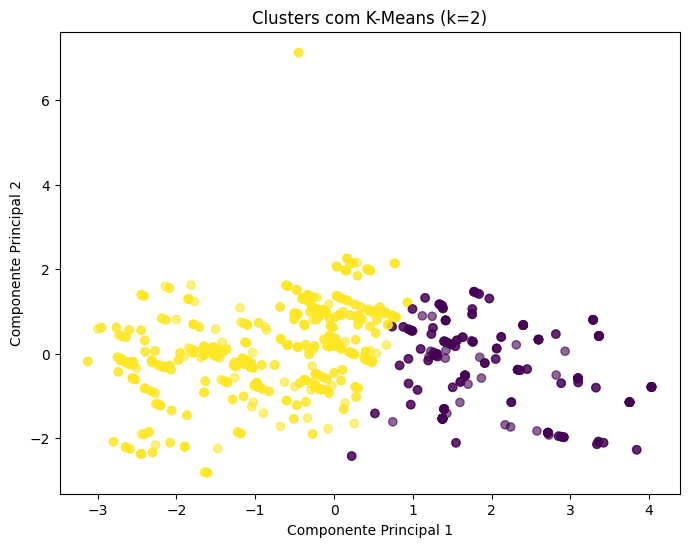

In [ ]:
# Visualização dos clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, alpha=0.6)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'Clusters com K-Means (k={k})')
plt.show()

# Questão 02 (45 pontos)
Utilizando o Roboflow, crie um modelo de detecção de anomalias em imagens médicas. Crie o dataset e treine o modelo com as ferramentas disponíveis no Roboflow. Implemente um notebook Python no Google Colab para demonstração do modelo funcional ou apresente um link do Roboflow Universe para teste do modelo com novas imagens.

Link do Roboflow: https://detect.roboflow.com/?model=health-hear-1lj9w&version=3&api_key=rPQhHt5BgHgrmUNVbwlw

In [ ]:
# Importando o Roboflow
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="rPQhHt5BgHgrmUNVbwlw")
project = rf.workspace().project("health-hear-1lj9w")
model = project.version(3).model

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# Importando imagem para teste do modelo:
imagem_teste = files.upload()

Saving queimadura3_5.jpg to queimadura3_5.jpg


In [ ]:
# Imagem para teste do modelo:
model.predict("queimadura3_5.jpg", confidence=40, overlap=30).save("prediction.jpg")

# Questão 03 (30 pontos)
Crie um modelo de classificação utilizando Redes
Neurais, preferencialmente usando o framework Keras, do Tensorflow. Avalie o modelo, apresente métricas e testes de predição do modelo.

In [ ]:
# Preparando os dados
# Codificação da variável alvo
label_encoder = LabelEncoder()
data['RiskLevel'] = label_encoder.fit_transform(data['RiskLevel'])

In [ ]:
# Separando as variáveis independentes e dependentes
X = data.drop('RiskLevel', axis=1).values
y = data['RiskLevel'].values

In [ ]:
# Divisão em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Padronização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Construindo o modelo de Rede Neural
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
# Compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
26/26 [==============================] - 7s 18ms/step - loss: 1.0102 - accuracy: 0.5166 - val_loss: 0.9332 - val_accuracy: 0.6059
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 0.8746 - accuracy: 0.6252 - val_loss: 0.8402 - val_accuracy: 0.6355
Epoch 3/100
26/26 [==============================] - 0s 8ms/step - loss: 0.8026 - accuracy: 0.6708 - val_loss: 0.7845 - val_accuracy: 0.6601
Epoch 4/100
26/26 [==============================] - 0s 8ms/step - loss: 0.7549 - accuracy: 0.6856 - val_loss: 0.7430 - val_accuracy: 0.6552
Epoch 5/100
26/26 [==============================] - 0s 10ms/step - loss: 0.7223 - accuracy: 0.6769 - val_loss: 0.7258 - val_accuracy: 0.6552
Epoch 6/100
26/26 [==============================] - 0s 7ms/step - loss: 0.6993 - accuracy: 0.6831 - val_loss: 0.7090 - val_accuracy: 0.6552
Epoch 7/100
26/26 [==============================] - 0s 7ms/step - loss: 0.6827 - accuracy: 0.6880 - val_loss: 0.7047 - val_accuracy: 0.6650
Epoch 8/100

In [ ]:
# Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test)
print("Acurácia do teste: {:.2f}%".format(accuracy * 100))

7/7 [==============================] - 0s 4ms/step - loss: 0.6611 - accuracy: 0.7192
Acurácia do teste: 71.92%


In [ ]:
# Relatório de classificação
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

7/7 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        47
           1       0.67      0.80      0.73        80
           2       0.72      0.58      0.64        76

    accuracy                           0.72       203
   macro avg       0.73      0.73      0.73       203
weighted avg       0.72      0.72      0.72       203



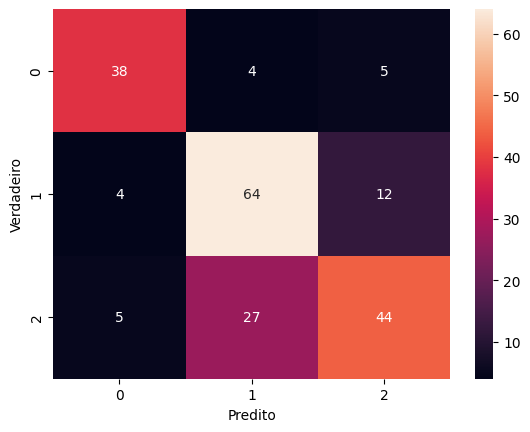

In [ ]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

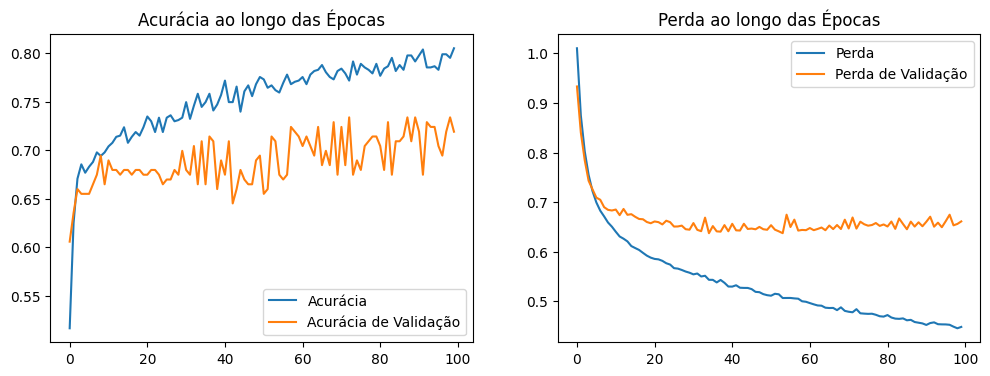

In [ ]:
# Visualização do histórico de treinamento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia ao longo das Épocas')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title('Perda ao longo das Épocas')
plt.legend()
plt.show()

In [ ]:
# Testes de Predição do Modelo
# Selecionando algumas amostras do conjunto de teste
amostras_teste = X_test[:10]
labels_verdadeiros = y_test[:10]

# Fazendo predições
predicoes = model.predict(amostras_teste)
predicoes_classes = np.argmax(predicoes, axis=1)

# Exibindo as predições
for i, (predicao, verdadeiro) in enumerate(zip(predicoes_classes, labels_verdadeiros)):
    predicao_decodificada = label_encoder.inverse_transform([predicao])[0]
    verdadeiro_decodificado = label_encoder.inverse_transform([verdadeiro])[0]
    print(f"Amostra {i}: Predição: {predicao_decodificada}, Verdadeiro: {verdadeiro_decodificado}")


1/1 [==============================] - 0s 17ms/step
Amostra 0: Predição: mid risk, Verdadeiro: mid risk
Amostra 1: Predição: high risk, Verdadeiro: high risk
Amostra 2: Predição: high risk, Verdadeiro: high risk
Amostra 3: Predição: mid risk, Verdadeiro: low risk
Amostra 4: Predição: mid risk, Verdadeiro: low risk
Amostra 5: Predição: mid risk, Verdadeiro: mid risk
Amostra 6: Predição: mid risk, Verdadeiro: mid risk
Amostra 7: Predição: mid risk, Verdadeiro: high risk
Amostra 8: Predição: mid risk, Verdadeiro: mid risk
Amostra 9: Predição: high risk, Verdadeiro: mid risk
